# (201902-fordgobike-tripdata)
## by (Mahmoud Wael Hamdy)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [153]:
# at the top of the file, before other imports
import warnings

warnings.filterwarnings('ignore')

# no warnings will be printed from now on.

In [154]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [155]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


##### no null or duplicated values, we just need to change some types of the columns


In [156]:
df.duplicated().sum()

0

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [158]:
#make a copy of the dataset
df_new = df.copy()

In [159]:
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

In [160]:
df_new['start_time'] = pd.to_datetime(df_new['start_time'])

In [161]:
df_new['start_station_id'] = df_new['start_station_id'].astype('str')

In [162]:
df_new['end_station_id'] = df_new['end_station_id'].astype('str')

In [163]:
df_new['bike_id'] = df_new['bike_id'].astype('str')

In [164]:
df_new['user_type'] = df_new['user_type'].astype('category')

In [165]:
df_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

###### make new columns


In [166]:
#make a new column duration in min
df_new['duration_min'] = np.round(df_new.duration_sec / 60).astype(int)

In [167]:
#extract the start and the end month
df_new['start_month'] = df_new['start_time'].dt.month_name()
df_new['end_month'] = df_new['end_time'].dt.month_name()

In [168]:
#extract the start and the end day of the week
df_new['start_day_week'] = df_new['start_time'].dt.day_name()
df_new['end_day_week'] = df_new['end_time'].dt.day_name()

In [169]:
#extract the start and the end day of the month
df_new['start_day_month'] = df_new['start_time'].dt.day
df_new['end_day_month'] = df_new['end_time'].dt.day

In [170]:
#extract the date in year-month-day
df_new['start_date'] = df_new['start_time'].dt.date
df_new['end_date'] = df_new['end_time'].dt.date

In [171]:
#extract the start and end hour
df_new['start_hour'] = df_new['start_time'].dt.hour
df_new['end_hour'] = df_new['end_time'].dt.hour

In [172]:
#drop unused columns
df_new.drop(['duration_sec','start_time','end_time','start_station_id','end_station_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1, inplace=True)

In [173]:
df_new.dtypes

start_station_name           object
end_station_name             object
bike_id                      object
user_type                  category
member_birth_year           float64
member_gender                object
bike_share_for_all_trip      object
duration_min                  int32
start_month                  object
end_month                    object
start_day_week               object
end_day_week                 object
start_day_month               int64
end_day_month                 int64
start_date                   object
end_date                     object
start_hour                    int64
end_hour                      int64
dtype: object

In [174]:
df_new.head()

,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_month,end_month,start_day_week,end_day_week,start_day_month,end_day_month,start_date,end_date,start_hour,end_hour
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,870,February,March,Thursday,Friday,28,1,2019-02-28,2019-03-01,17,8
1,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No,709,February,March,Thursday,Friday,28,1,2019-02-28,2019-03-01,18,6
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1031,February,March,Thursday,Friday,28,1,2019-02-28,2019-03-01,12,5
3,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608,February,March,Thursday,Friday,28,1,2019-02-28,2019-03-01,17,4
4,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26,February,March,Thursday,Friday,28,1,2019-02-28,2019-03-01,23,0


In [175]:
df_new.shape

(183412, 18)

### What is the structure of your dataset?

> data has 183412 rows and 18 columns about bike trips

### What is/are the main feature(s) of interest in your dataset?

> The main features of my goal in the data are to find the most wanted and the least time to ride, what are the most popular types of users in our data and their features?,
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Day of the week, day of month, month, trip duration in minutes, start and end hour, type of subscriber user or customer, these columns are the most important, start station name, end stop name and bike ID, these are the least important columns for me,

## Univariate Exploration



### What is the duration of most rides?
> The graph is so messy that we need to change the scale of the data, and we can solve it with the standard deviation

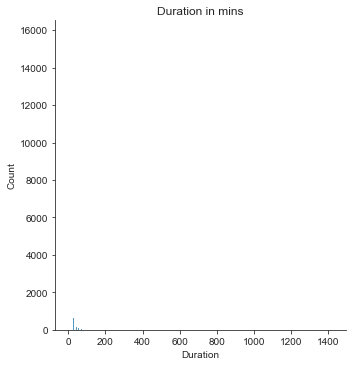

In [176]:
#make histogram to see the distripution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df_new.duration_min);
plt.title('Duration in mins');
plt.xlabel('Duration');

In [177]:
#customize the number of the bins
bins = np.arange(0, df_new.duration_min.std()+1,1)

### What is the duration of most rides?
>I think the most duration of the trips is Approximately 6 mins

>In this plot I think analyzing the start and end day, hour, the month will give the same result, so I will only do my process on start time columns

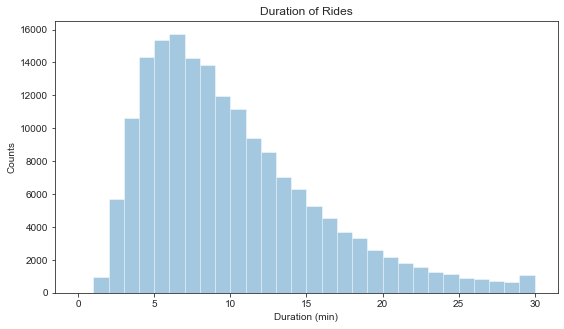

In [178]:
#size of the graph
plt.figure(figsize=[9,5]);
#plot the histogram
sns.set_style('ticks')
sns.distplot(df_new.duration_min, bins=bins, kde=False);
#plot label
plt.title('Duration of Rides');
#x label
plt.xlabel('Duration (min)')
#y label
plt.ylabel('Counts')
# plot show
plt.show()


## What are the most popular start and end stations?

>Market St at 10th St and San Caltrain Francisco station2(townsend St at 4th St) are the most common start station

>San Caltrain Francisco station2(townsend St at 4th St )and Market St at 10th St are the most common end station

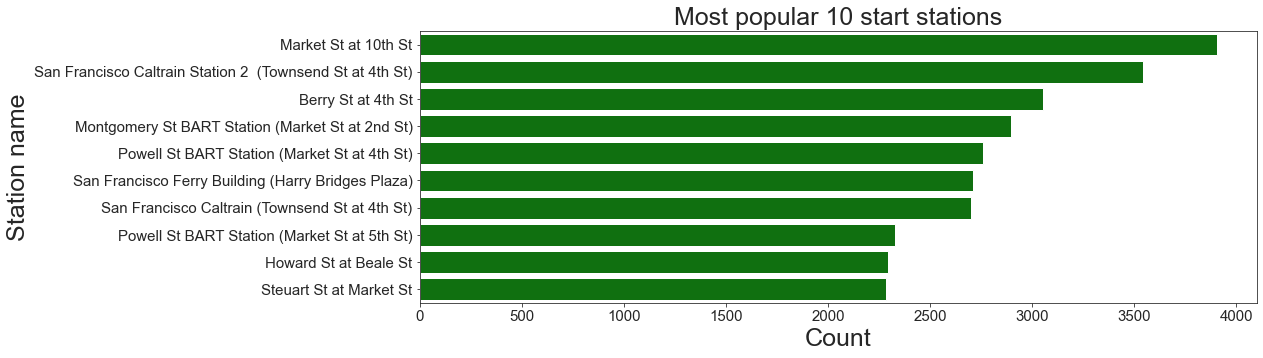

In [179]:
#Set a larger figure size for subplots
plt.figure(figsize=[15, 11]);
# 2 rows, 1 col, subplot 1
plt.subplot(2, 1, 1);
sns.countplot(data=df_new, y='start_station_name',color='green',order=df_new.start_station_name.value_counts().iloc[:10].index);
#y axis label
plt.ylabel("Station name",size=25);
plt.yticks(size=15);
#x axis label(Counts)
plt.xlabel("Count",size=25);
plt.xticks(size=15);
#plot title(start_station_name)
plt.title("Most popular 10 start stations",size = 25);   


> end graph



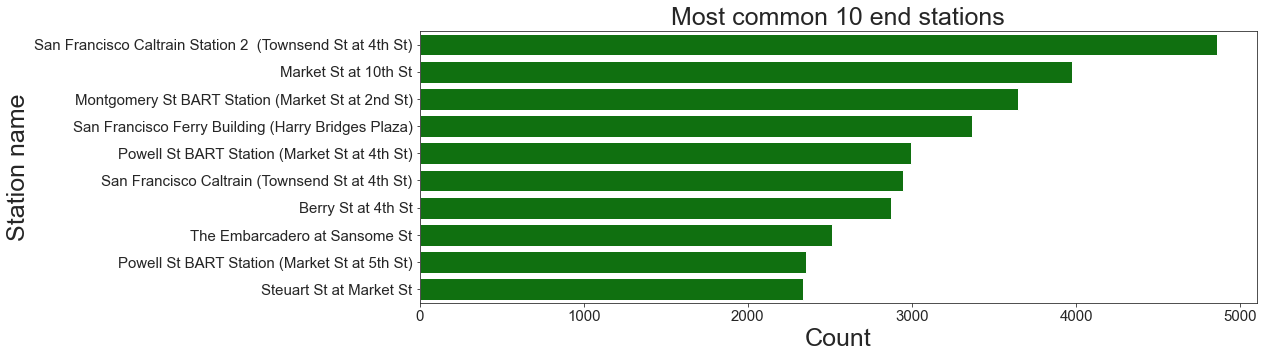

In [180]:
#Set a larger figure size for subplots
plt.figure(figsize=[15, 11]);
# 2 row, 1 col, subplot 2
plt.subplot(2, 1, 2) 
sns.countplot(data=df_new, y='end_station_name',color='green',order=df_new.end_station_name.value_counts().iloc[:10].index);
#y axis label(end_station_name)
plt.ylabel("Station name",size=25)
plt.yticks(size=15)
#x axis label(Counts)
plt.xlabel("Count",size=25)
plt.xticks(size=15)
#plot title
plt.title("Most common 10 end stations",size = 25);

### What is the most common hour?
>8 AM, 5 PM are the most common hours while hours from 12 am to 5 am are the least

>I think the hours are those from 7 to 9 in the morning and from 4 to 6 in the evening. This may be related to the time workers and students go to and leave work and school.

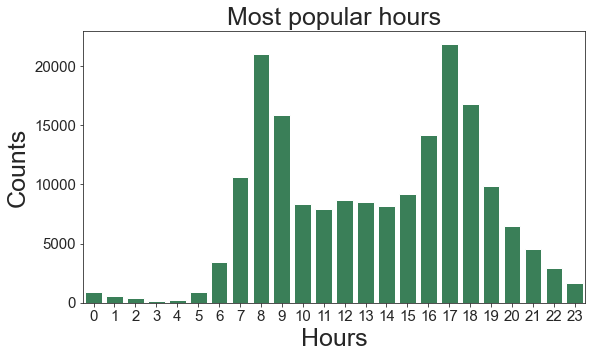

In [181]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.countplot(data=df_new, x='start_hour',color="seagreen");
#y axis label(Counts)_
plt.ylabel("Counts",size=25)
plt.yticks(size=15)
#x axis label(start_hour)
plt.xlabel("Hours",size=25)
plt.xticks(size=15)
#plot title
plt.title("Most popular hours",size = 25);


## What is the most common day in the week?
 >Thursday andTuesday  are the most common days, while Sunday and saturday is the least day
 
 >Saturday and Sunday are the weekend in the United States of America.

In [182]:
#change the days into ordered values to sort it
WEEKDAY = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
WEEKCATG = pd.api.types.CategoricalDtype(ordered=True, categories=WEEKDAY)
#apply it on start day
df_new['start_day_week'] = df_new['start_day_week'].astype(WEEKCATG)

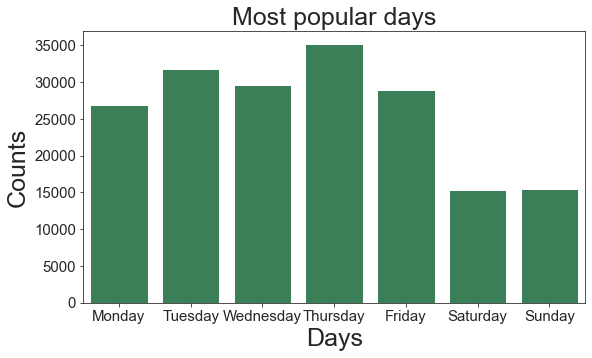

In [183]:
#size of the chart
plt.figure(figsize=[9,5]);
#plot a bar chart
sns.countplot(data=df_new, x='start_day_week',color='seagreen');
#y axis label
plt.ylabel("Counts",size=25)
plt.yticks(size=15)
#x axis label
plt.xlabel("Days",size=25)
plt.xticks(size=15)
#plot title
plt.title("Most popular days",size = 25);


## What is the most common day in the month?
>Day 20 and 28 are the most common too, while 9 and 3 are the least

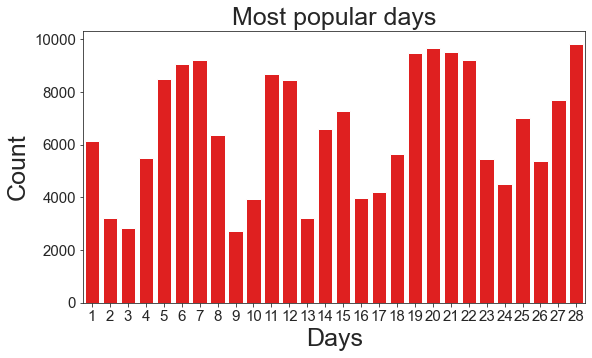

In [184]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.countplot(data=df_new, x='start_day_month',color='red');
#y axis label
plt.ylabel("Count",size=25);
plt.yticks(size=15);
#x axis label
plt.xlabel("Days",size=25);
plt.xticks(size=15);
#plot label
plt.title("Most popular days",size = 25);

#### What is the most common user type?

>10.8% of the riders are Custmoers while 89.2% are Subscriber.


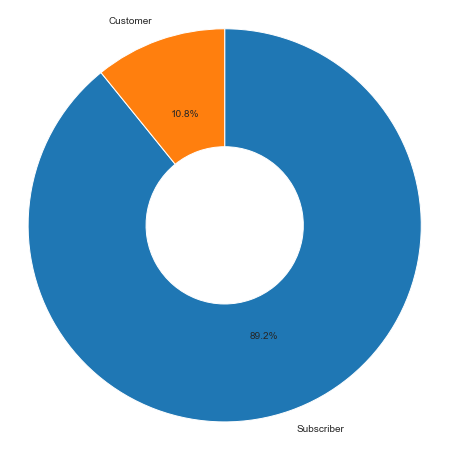

In [185]:
#size of the chart
plt.figure(figsize=[11, 8]);
plt.pie(df_new['user_type'].value_counts(), labels=df_new['user_type'].value_counts().index, startangle = 90, wedgeprops = {'width' : 0.6}, counterclock = False, autopct='%.1f%%');
plt.axis('square');

#### What is the most common gender?
> 74.6% of Male users,23.3% female ,and 2.1% other users

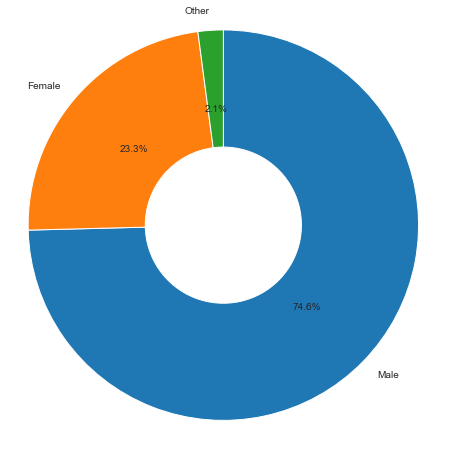

In [186]:
#size of the chart
plt.figure(figsize=[15, 8]);
plt.pie(df_new['member_gender'].value_counts(), labels=df_new['member_gender'].value_counts().index, startangle = 90, wedgeprops = {'width' : 0.6}, counterclock = False, autopct='%.1f%%');

plt.axis('square');


### What is the most bike ridden?
>bikes with id 4794 and 4814 are most in this data

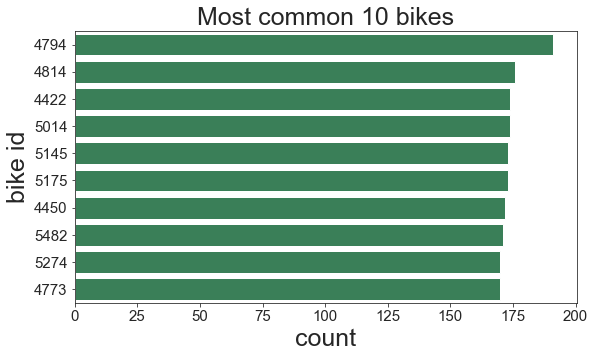

In [187]:
#size of the chart
plt.figure(figsize=[9, 5]);
sns.countplot(data=df_new, y='bike_id',color='seagreen',order=df_new.bike_id.value_counts().iloc[:10].index);

#x axis label(count)
plt.xlabel("count",size=25)
plt.xticks(size=15)
#y axis label(bike_id)
plt.ylabel("bike id",size=25)
plt.yticks(size=15)
#plot label
plt.title("Most common 10 bikes",size = 25);


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>  I  think the dataset is good, we just want to transform the time scale with standard deviation to suit that

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created new columns from start and end date time eg hour, day and month, changed duration to minutes to be more realistic, dropped unimportant columns that would not be useful in my analysis

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the average duration for every user type?

>the average time which riders (customers)  take type is higher than the average of Subscribers, the riders (customers) have longer trips, whereas Subscribers have shorter trips

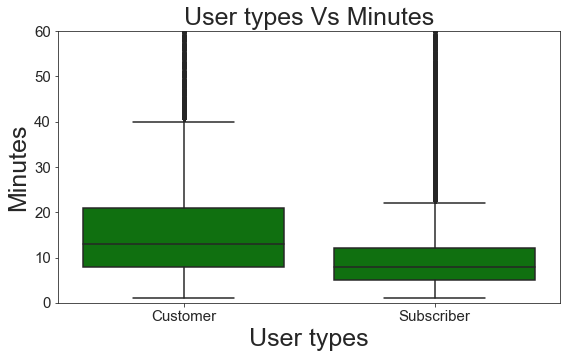

In [188]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.boxplot(data=df_new, x='user_type',y='duration_min',color='green');
#x axis label
plt.xlabel("User types",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("Minutes",size=25)
plt.yticks(size=15)
#plot label
plt.title("User types Vs Minutes",size = 25);
plt.ylim(0,60);

### What is the average duration formember gender?

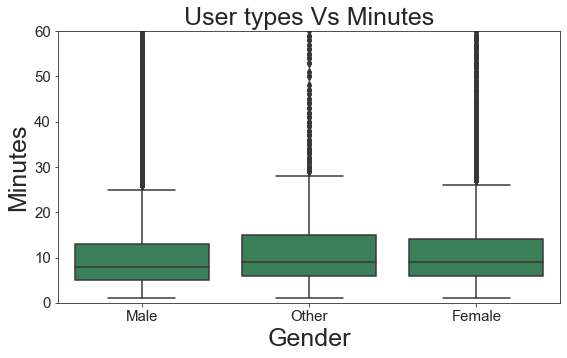

In [189]:
#size of the graph
plt.figure(figsize=[9,5]);
#plot a bar chart
sns.boxplot(data=df_new, x='member_gender',y='duration_min',color='seagreen');
#x axis label
plt.xlabel("Gender",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("Minutes",size=25)
plt.yticks(size=15)
#plot label
plt.title("User types Vs Minutes",size = 25);
plt.ylim(0,60);

### Distribution of member_birth_year

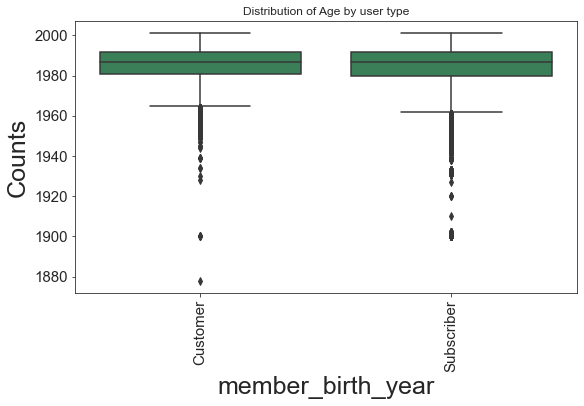

In [190]:
#size of the graph
plt.figure(figsize=[9,5]);
#plot a bar chart
sns.boxplot(data=df_new, x='user_type',y='member_birth_year',color='seagreen');
plt.xticks(rotation=90)
#x axis label
plt.xlabel('member_birth_year',size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel('Counts',size=25)
plt.yticks(size=15)
#plot title
plt.title("Distribution of Age by user type")
plt.show()

### What is the duration for the most common station?
>the average for all station around 10, but San francisco ferry building(Hary Bridges plaza)  is 17

>the average for all station around 10, but The Embarcadero at Sansame St is 19

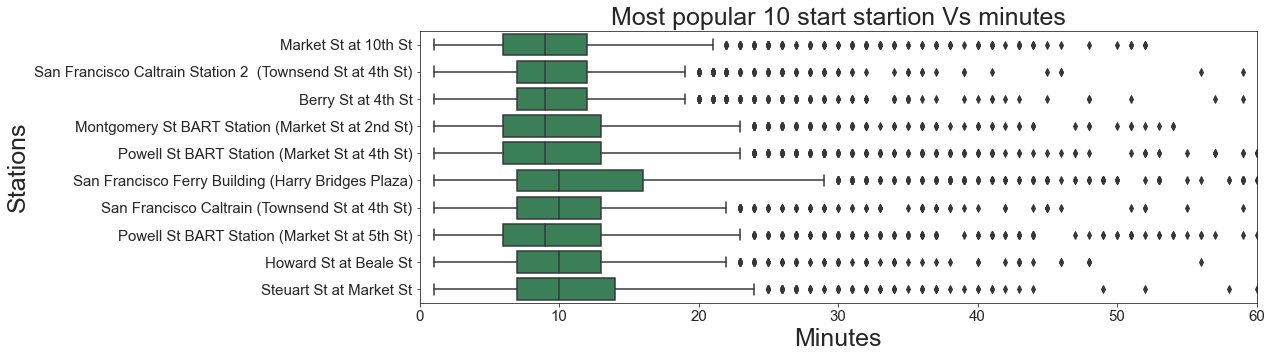

In [191]:
#size of the graph
plt.figure(figsize=[15, 11]);
50#plot number 1
plt.subplot(2,1,1)
#plot a bar chart
sns.boxplot(data=df_new, y='start_station_name',x='duration_min',color='seagreen',order=df_new.start_station_name.value_counts().iloc[:10].index);
#x axis label
plt.xlabel("Minutes",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("Stations",size=25)
plt.yticks(size=15)
#plot title
plt.title("Most popular 10 start startion Vs minutes",size = 25);
plt.xlim(0,60);

>end_station



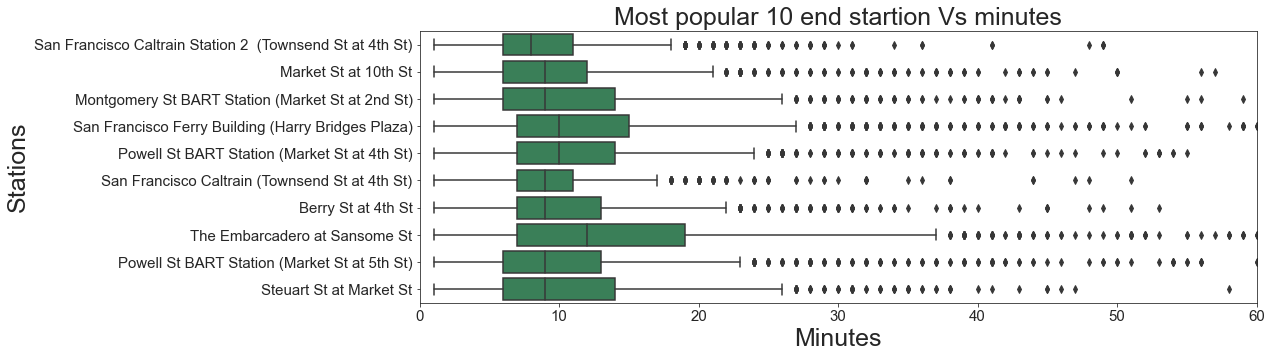

In [192]:
#size of the graph
plt.figure(figsize=[15, 11]);
#plot number 2
plt.subplot(2,1,2)
#plot a bar chart
sns.boxplot(data=df_new, y='end_station_name',x='duration_min',color="seagreen",order=df_new.end_station_name.value_counts().iloc[:10].index);
#x axis label(duration_min)
plt.xlabel("Minutes",size=25)
plt.xticks(size=15)
#y axis label(end_station_name)
plt.ylabel("Stations",size=25)
plt.yticks(size=15)
#plot title
plt.title("Most popular 10 end startion Vs minutes",size = 25);
plt.xlim(0,60);


### What is the average duration of each day?
>the average of all days is around 10 minutes , but the average duration of Saturday and Sunday is more necessary bit than the others day,  


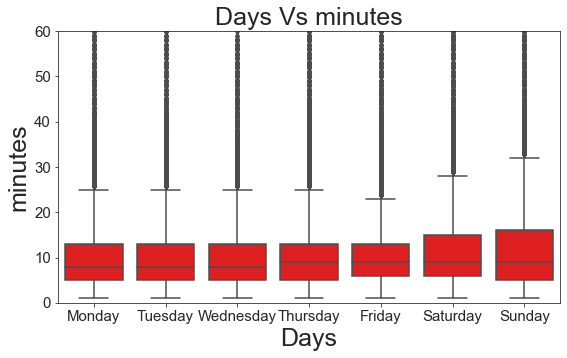

In [193]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.boxplot(data=df_new, x='start_day_week',y='duration_min',color="red");
#x axis label
plt.xlabel("Days",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("minutes",size=25)
plt.yticks(size=15)
#plot title
plt.title("Days Vs minutes",size = 25);
plt.ylim(0,60);

### What is the frequency of users type per hour?
>  the hours for both user types are those from 7 - 9 am and from 4 - 6 pm. This might be related to the time when employees and students go to and leave work and school.



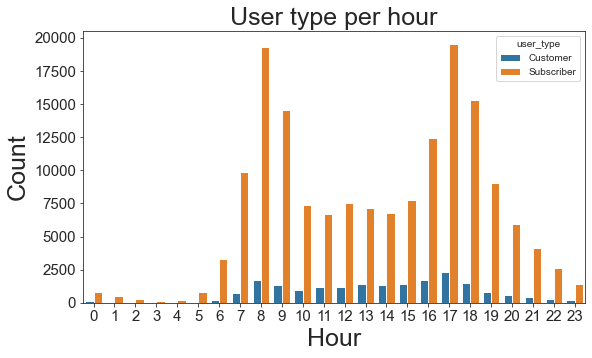

In [194]:
#size of the graph
plt.figure(figsize=[9,5]);
#bar chart
sns.countplot(data=df_new, x='start_hour',hue='user_type');
#x axis label
plt.xlabel("Hour",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=25)
plt.yticks(size=15)
#plot title
plt.title("User type per hour",size = 25);



### What is the frequency of users type per day?
>the frequency of the Subscriber type on weekdays is almost equal too and their trips are almost on weekdays but the frequency of the Customer type on weekdays is almost equal, but they prefer doing trips on weekends


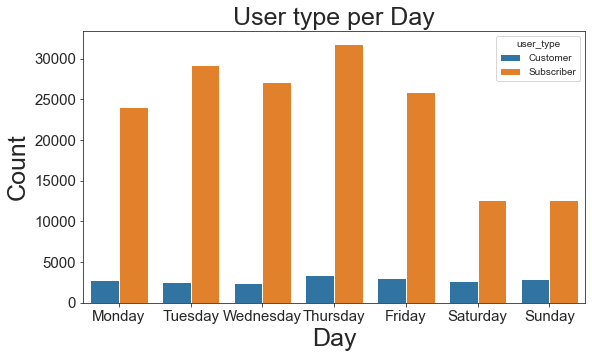

In [195]:
#size of the graph
plt.figure(figsize=[9, 5]);
#bar chart
sns.countplot(data=df_new, x='start_day_week',hue='user_type');
#x axis label
plt.xlabel("Day",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("Count",size=25)
plt.yticks(size=15)
#plot title
plt.title("User type per Day",size = 25);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I think the average for all  days are almost equal, most of rides happen in the working hours as they go to their work and left, they did a lot of rides in weekdays than weekends and the average time which Customers take type is higher than the average of Subscriber,


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> >the average for all station around 10, but The Embarcadero at Sansame St is 19

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Trip distribution over weekdays and by customer type
>Customers have consistently longer trips than subscribers

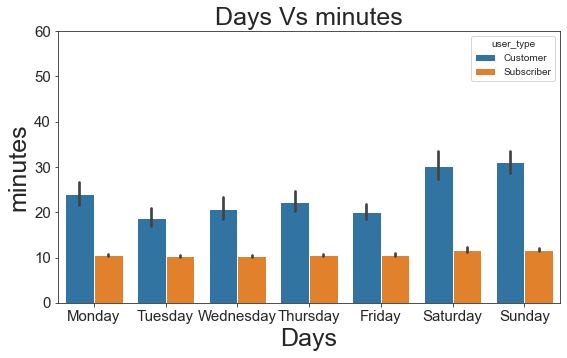

In [196]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.barplot(data=df_new, x='start_day_week',y='duration_min', hue='user_type');
#x axis label
plt.xlabel("Days",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("minutes",size=25)
plt.yticks(size=15)
#plot title
plt.title("Days Vs minutes",size = 25);
plt.ylim(0,60);


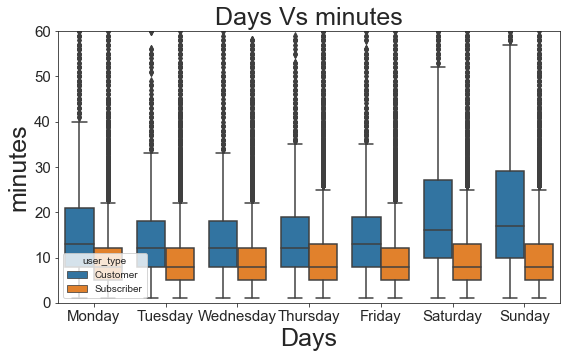

In [197]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.boxplot(data=df_new, x='start_day_week',y='duration_min', hue='user_type');
#x axis label
plt.xlabel("Days",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("minutes",size=25)
plt.yticks(size=15)
#plot title
plt.title("Days Vs minutes",size = 25);
plt.ylim(0,60);

### Trip duration over day hours and by customer type
>customers have consistently higher trips across all hours of the day. However, customer trips are much longer at midnight and midday


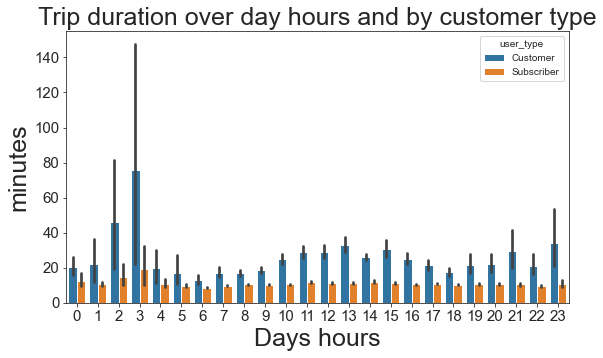

In [198]:
#size of the graph
plt.figure(figsize=[9, 5]);
#plot a bar chart
sns.barplot(data=df_new, x='start_hour',y='duration_min', hue='user_type');
#x axis label
plt.xlabel("Days hours",size=25)
plt.xticks(size=15)
#y axis label
plt.ylabel("minutes",size=25)
plt.yticks(size=15)
#plot label
plt.title("Trip duration over day hours and by customer type",size = 25);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Customers have higher trips than subscribers
Customers enjoy higher flights at all hours of the day. However, customer trips are much longer in the middle of the night and in the middle of the day
There is a distinct different usage pattern between customers and subscribers in the way we explained earlier



### Were there any interesting or surprising interactions between features?
>I think customer rides mostly occur during midnight and midday


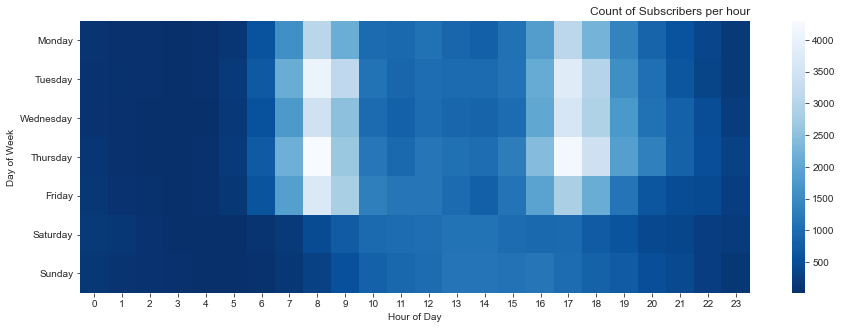

In [199]:
#size of the plot
plt.figure(figsize = (15,11))
plt.subplot(2, 1, 1)
#pick only Subscriber type from the data
customers = df_new[df_new['user_type'] == "Subscriber"] 
#group the data by start day and start hour
ct = customers.groupby(['start_day_week', 'start_hour']).size()
ct = ct.reset_index(name='count')
#create a pivot table
ct = ct.pivot(index='start_day_week', columns='start_hour', values='count')
#create a heatmap
sns.heatmap(ct, cmap='Blues_r');
#plot title
plt.title('Count of Subscribers per hour', loc='right');
#x axis label
plt.xlabel('Hour of Day');
#y axis label
plt.ylabel('Day of Week');


### Customer

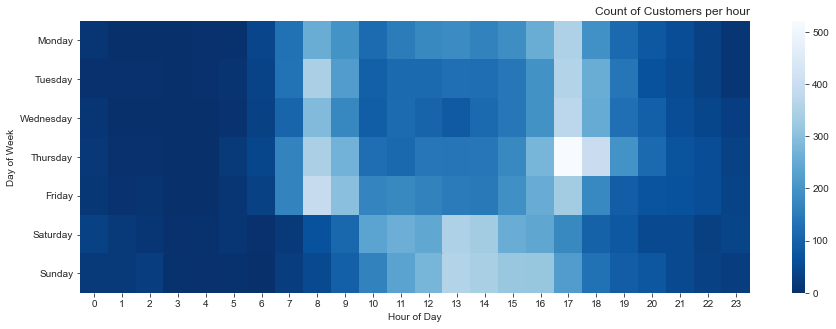

In [200]:
#size of the plot
plt.figure(figsize = (15,11))
plt.subplot(2, 1, 1)
#pick only Customer type from the data
customers = df_new[df_new['user_type'] == "Customer"] 
#group the data by start day and start hour
ct = customers.groupby(['start_day_week', 'start_hour']).size()
ct = ct.reset_index(name='count')
#create a pivot table
ct = ct.pivot(index='start_day_week', columns='start_hour', values='count')
#create a heatmap
sns.heatmap(ct, cmap='Blues_r');
#plot title
plt.title('Count of Customers per hour', loc='right');
#x axis label
plt.xlabel('Hour of Day');
#y axis label
plt.ylabel('Day of Week');


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [203]:
!jupyter nbconvert exploration_template.slides.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook exploration_template.slides.ipynb to slides
[NbConvertApp] Writing 1496412 bytes to exploration_template.slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Dell\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Dell\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Dell\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_file